

# Jamboree Education - Linear Regression



Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

Column Profiling:



*   Serial No. (Unique row ID)
*   GRE Scores (out of 340)
*   TOEFL Scores (out of 120)
*   University Rating (out of 5)
*   Statement of Purpose and Letter of Recommendation Strength (out of 5)
*   Undergraduate GPA (out of 10)
*   Research Experience (either 0 or 1)
*   Chance of Admit (ranging from 0 to 1)










# Problem Statement

Analyse the predictor variables to draw insight about the impoetance of various factors in prediction of chances of Admission and the relation between variables and their affect on Chance of Admit.

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns


In [67]:
# from google.colab import files
# uploaded = files.upload()  # Opens a dialog box to select the CSV file



In [68]:
df = pd.read_csv('/content/Jamboree_Admission.csv')

In [69]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [70]:
# checking null values
df.isnull().sum()


,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


as we see that 'Serial No.' is not contributing and is misleading the dataset, so we will remove the column 'Serial No.'

In [71]:
df= df.drop(['Serial No.'],axis = 1) # Serial No. column dropped

In [72]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Stastical Analysis

In [73]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Columns 'Univeersity', 'Rating', 'SOP', 'LOR' and 'Research' are categorical columns that have numerical values
changing the datatype of these columns to 'category'

In [74]:
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']

for col in cat_cols:
    df[col] = df[col].astype('category')

In [75]:
df.shape

(500, 8)

we have 500 rows and 8 columns

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 18.8 KB


# Stastical Analysis

In [77]:
df.describe()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,8.576440,0.72174
std,11.295148,6.081868,0.604813,0.14114
min,290.000000,92.000000,6.800000,0.34000
25%,308.000000,103.000000,8.127500,0.63000
50%,317.000000,107.000000,8.560000,0.72000
75%,325.000000,112.000000,9.040000,0.82000
max,340.000000,120.000000,9.920000,0.97000


**Pairpot for checking relationship between features**

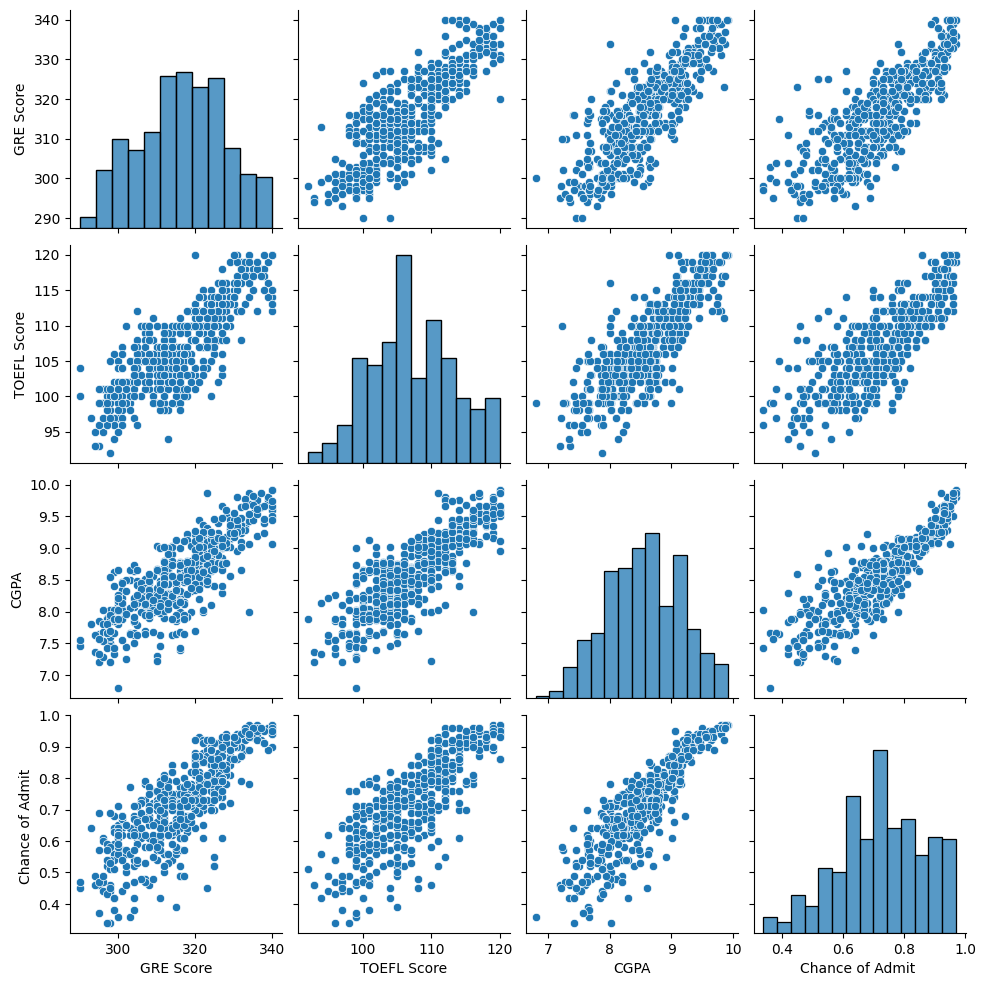

In [78]:
# Pairpot for checking relationship between features

import seaborn as sns

sns.pairplot(df)

From pairplot we can observe linear relationship between features
'Chance of Admit' and 'GRE Score'
'Chance of Admit' and 'TOEFL Score'
'Chance of Admit' and CGPA
'CGPA' and 'TOEFL'
'CGPA' and 'GRE Score'
'TOEFL Score' and 'GRE Score'


People who have High GRE Score more Chance of Admit and have more TOEFL Score and CGPA

# Heat map to analyse corelation between the dataset features

A heatmap is a graphical representation of data where values are depicted by color. It is used to visualize and compare datasets. Heatmaps can display relationships between variables, reveal patterns, and highlight correlations. They show changes over time or across different groups and are effective tools for quickly identifying trends and outliers.






<Axes: >

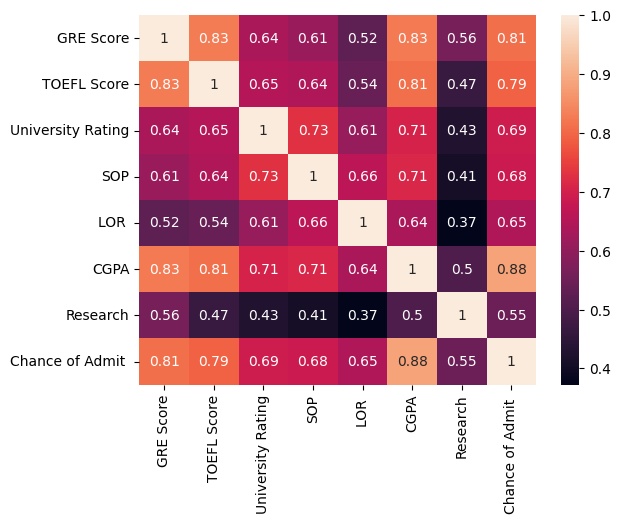

In [79]:
sns.heatmap(df.corr(), annot = True)

*   GRE Score, TOEFL score , University Rating, SOP,LOR,CGPA,RESEARCH, Chance of admit are Independent Variables

*   From above we have observed CGPA, GRE Score and TOEFL score have high corelation with Chance of Admit







# Univariate Analysis

**Histogram**

A histogram is a graphical representation of the distribution of numerical data. Histograms are useful for EDA visualizing the shape of a distribution, identifying patterns, understanding the spread of data, including distribution, central tedency and outliers.

**Boxplot**

Boxplot is a graphical representation of the distribution of a set of data, Boxplots are useful for comparing the distribution of data across different groups or to identify outliers and skewness in the data.

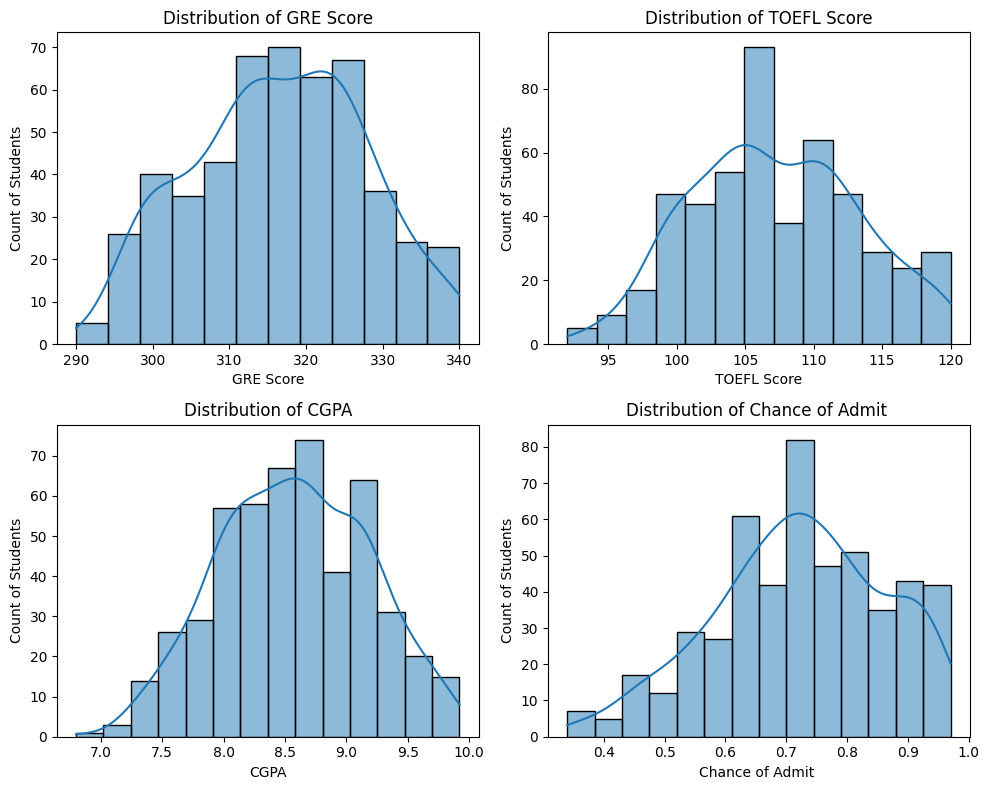

In [80]:

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float','int']).columns.tolist()

plt.figure(figsize=(10,8))
i=1
for col in numeric_cols:
  ax=plt.subplot(2,2,i)
  sns.histplot(data=df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i += 1

plt.tight_layout()
plt.show();



*   Distribution of GRE sscre shows that most of the data lies between range of 310-330, in over all range of 290-340.
*   Distribution of TOEFL score lies between range of 90-120 and maximum of stiudents have score around 10
*   Distribution of CGPA lies with in range of 7-10 and maximum lies around 8.5.
*   Distribution of Chance of admit lies between 0.4-1.0 and maximum lies around 0.7



People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

# Univariate analysys for the categorical columns

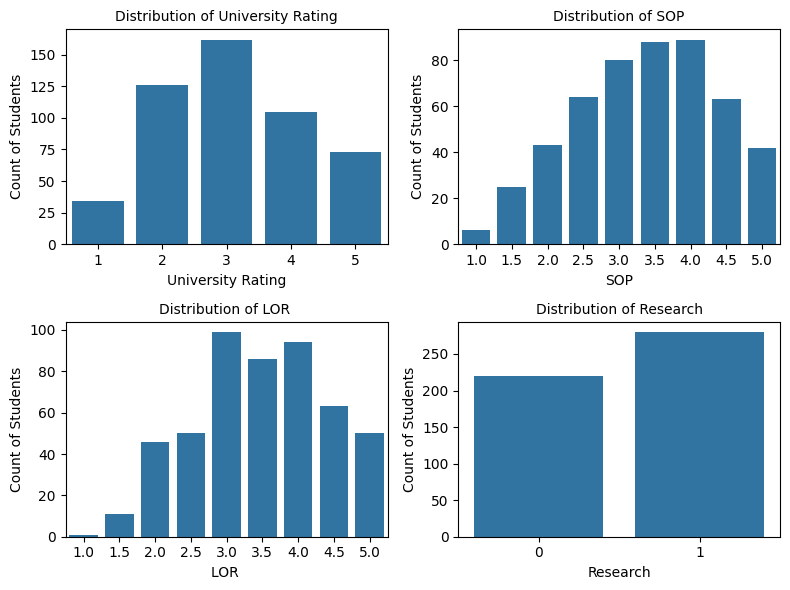

In [81]:
#Univariate analysis of count of students vs categorical columns
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']

plt.figure(figsize=(8,6))
i=1

for col in cat_cols:
  ax = plt.subplot(2,2,i)
  sns.countplot(x=df[col])
  plt.title(f'Distribution of {col}', fontsize=10)
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i+=1

plt.tight_layout()
plt.show();

The most frequent occurance in the categorical columns are as below


*   University Rating- 3
*   SOP- 3.5 and 4
*   LOR- 3.0
*   Research- True

### **Bivariate Analysis**

Numericall columns VS cChance of admit

GRE Score


<Figure size 100x100 with 0 Axes>

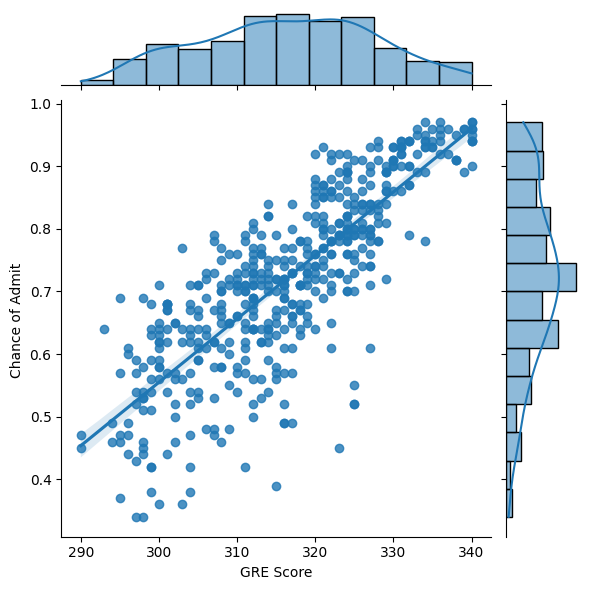

TOEFL Score


<Figure size 100x100 with 0 Axes>

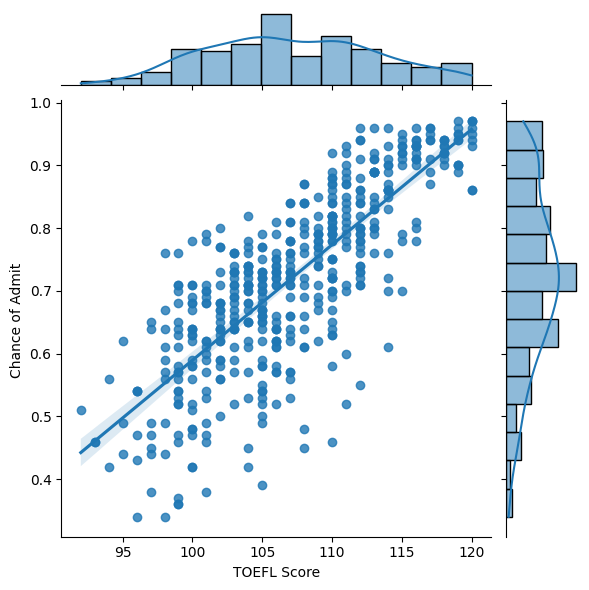

CGPA


<Figure size 100x100 with 0 Axes>

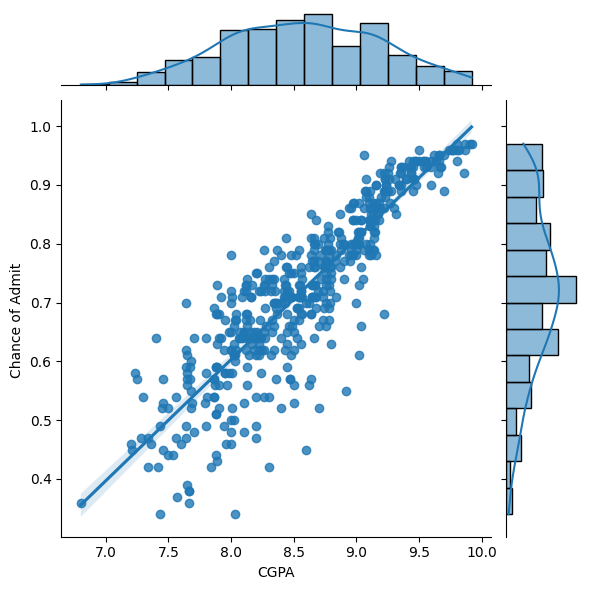

Chance of Admit 


<Figure size 100x100 with 0 Axes>

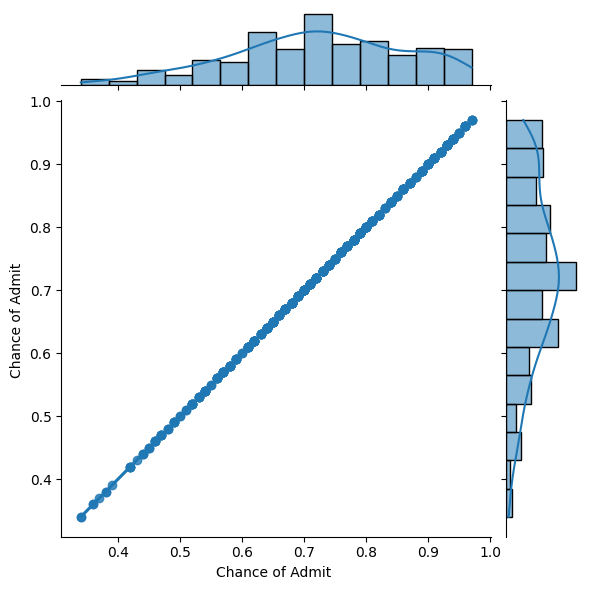

In [82]:
for col in numeric_cols:
    print(col)
    plt.figure(figsize=(1,1))
    sns.jointplot(data=df,x=df[col],y=df["Chance of Admit "],kind="reg")
    plt.show()

### Boxplot for Categorical Vs Chance of Admit

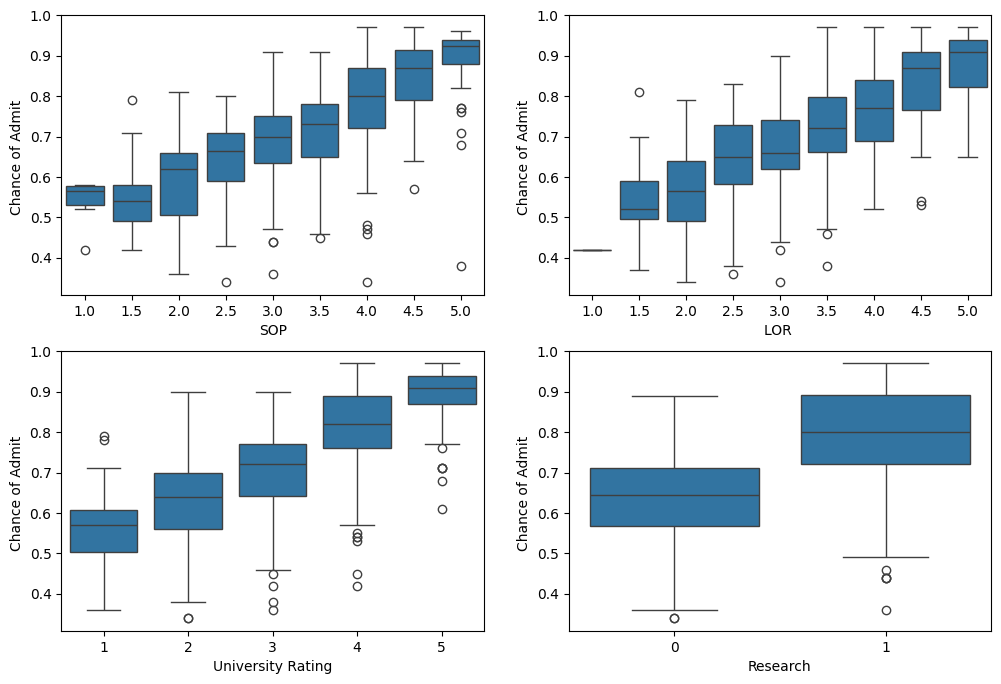

In [83]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(y = df["Chance of Admit "], x = df["SOP"])
plt.subplot(2,2,2)
sns.boxplot(y = df["Chance of Admit "], x = df["LOR "])
plt.subplot(2,2,3)
sns.boxplot(y = df["Chance of Admit "], x = df["University Rating"])
plt.subplot(2,2,4)
sns.boxplot(y = df["Chance of Admit "], x = df["Research"])
plt.show()



*   SOP Statement of purpose have positive impacto the Chance of admit, as observed form the Boxplot as the SOP increaes the chance od admit also increased.
*   LOR - Letter of Recommendation also shows positive corelation on Chance of admit.
*   Students with Research have high chance of Admission

### **Data Pre-processing**

Data preprocessing is a crucial step in the data science pipeline. It involves transforming and cleaning raw data to make it suitable for analysis, handling Missing values/Outliers/duplicates/ null values.

In [84]:
df.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


As observed there are no null values found in the dataset.

In [85]:
df.duplicated().value_counts()

,count
False,500


As ovserved from the above there are no duplicate value found in the dataset.

Checking for outlier using boxplot in the numerical columns.

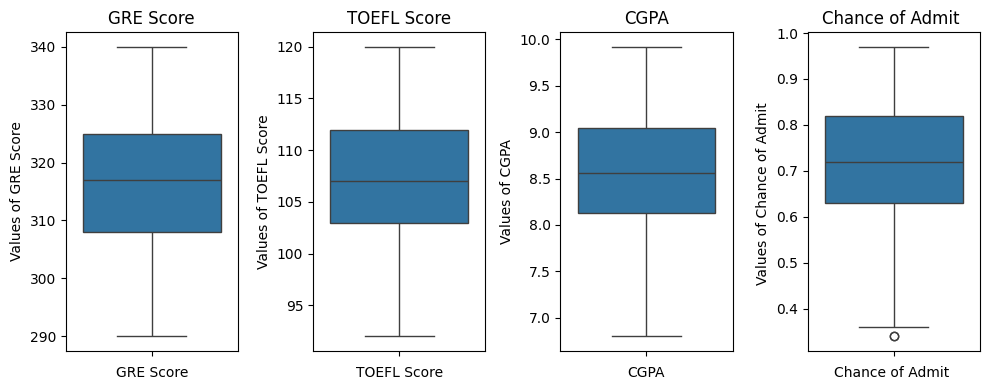

In [86]:
plt.figure(figsize=(10,4))
i=1

for col in numeric_cols:
  ax = plt.subplot(1,4,i)
  sns.boxplot(df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel(f'Values of {col}')
  i+=1

plt.tight_layout()
plt.show()

After observing from above boxplots we can conclude that there are no outliets in the dataset and al the values are in between the whiskers.

**Before processing further, removing the dependant cariable(Chance of Admit).**

In [87]:
from sklearn.model_selection import train_test_split
X = df.drop(["Chance of Admit "], axis = 1)

y = df["Chance of Admit "]

y = pd.DataFrame(y)

X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


Now the dependent variable(Chance of Admit) removed.

**Creating train and test split in the ratio 80-20**

In [88]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train , y_test = train_test_split(X,y,random_state = 1, test_size = 0.2, shuffle = True)


In [89]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [90]:
y_train

,Chance of Admit
238,0.70
438,0.67
475,0.59
58,0.36
380,0.78
...,...
255,0.79
72,0.93
396,0.84
235,0.88


# **Standardazitation of columns**

In [91]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)


In [92]:
X_train.shape, X_test.shape

((400, 7), (100, 7))

In [93]:
X_train

array([[-0.53736015, -0.51949116, -0.05463584, ...,  0.00933125,
        -0.32658176, -1.11114215],
       [ 0.16363964,  0.44925692, -1.8029826 , ...,  0.00933125,
        -0.04593523,  0.89997486],
       [-1.41360989, -1.0038652 , -0.05463584, ..., -1.05709751,
        -1.13550409, -1.11114215],
       ...,
       [ 0.77701445, -0.03511712, -0.05463584, ...,  0.00933125,
         0.89505605,  0.89997486],
       [ 0.86463943,  0.61071493,  1.69371093, ...,  0.54254563,
         1.09315948,  0.89997486],
       [-1.41360989, -0.35803314, -1.8029826 , ..., -1.59031189,
        -1.26757304, -1.11114215]])

In [94]:
X_test

array([[-0.45364393, -0.195386  , -1.18654382, -1.06680512, -1.67399033,
        -0.30312686, -1.19959343],
       [-0.54756607, -0.01613279, -0.28764699, -0.49935559, -0.52348151,
        -0.25285706,  0.83361577],
       [ 1.98833168,  2.13490577,  1.51014668,  1.202993  ,  0.62702731,
         1.82496108, -1.19959343],
       [-0.17187751, -0.01613279, -1.18654382,  0.06809394,  0.0517729 ,
         0.0487617 ,  0.83361577],
       [ 0.67342174,  0.52162685,  0.61124985,  1.202993  ,  0.62702731,
         0.58497283,  0.83361577],
       [-0.64148821, -1.09165207, -1.18654382, -1.06680512,  0.0517729 ,
        -0.45393624,  0.83361577],
       [ 0.20381104, -0.55389243, -0.28764699, -0.49935559,  0.0517729 ,
         0.21632768,  0.83361577],
       [ 0.86126601, -0.73314564, -0.28764699,  0.63554347,  0.62702731,
        -0.52096263,  0.83361577],
       [ 0.29773318,  0.70088006, -0.28764699,  0.06809394,  0.62702731,
         0.36713706,  0.83361577],
       [ 0.01596676, -0.1953

Maintaining the dataframe formate after Normalisation

In [95]:
#Maintaining the dataframe format after Normalisation
X_train = pd.DataFrame(X_train, columns = df.columns[:-1])

X_test = pd.DataFrame(X_test, columns = df.columns[:-1])

In [96]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.537360,-0.519491,-0.054636,-1.337783,0.009331,-0.326582,-1.111142
1,0.163640,0.449257,-1.802983,-0.845045,0.009331,-0.045935,0.899975
2,-1.413610,-1.003865,-0.054636,0.140430,-1.057098,-1.135504,-1.111142
3,-1.413610,-1.326781,-1.802983,-0.352308,-1.590312,-2.918435,0.899975
4,0.514140,-0.519491,-0.054636,0.140430,0.542546,0.449323,0.899975
...,...,...,...,...,...,...,...
395,-0.800235,0.449257,0.819538,0.633168,1.075760,-0.326582,-1.111142
396,0.426515,0.610715,1.693711,1.618644,1.608974,1.456349,0.899975
397,0.777014,-0.035117,-0.054636,-0.352308,0.009331,0.895056,0.899975
398,0.864639,0.610715,1.693711,1.125906,0.542546,1.093159,0.899975


In [97]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.453644,-0.195386,-1.186544,-1.066805,-1.673990,-0.303127,-1.199593
1,-0.547566,-0.016133,-0.287647,-0.499356,-0.523482,-0.252857,0.833616
2,1.988332,2.134906,1.510147,1.202993,0.627027,1.824961,-1.199593
3,-0.171878,-0.016133,-1.186544,0.068094,0.051773,0.048762,0.833616
4,0.673422,0.521627,0.611250,1.202993,0.627027,0.584973,0.833616
...,...,...,...,...,...,...,...
95,0.861266,0.700880,0.611250,0.635543,1.202282,0.651999,0.833616
96,0.391655,1.238640,1.510147,1.202993,0.627027,0.551460,0.833616
97,-1.862476,-1.629412,-1.186544,0.635543,-0.523482,-0.973391,-1.199593
98,-0.171878,0.521627,-0.287647,0.068094,0.627027,-0.085291,-1.199593


## **Training Linear Regression Model**

In [98]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()

model_LR.fit(X_train, y_train)

LinearRegression()

### Now predicting values for training and test data

In [99]:
y_pred_train = model_LR.predict(X_train)

y_pred = model_LR.predict(X_test)


### **Using multiple loss function Evaluating linear Regression Model**

In [100]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

def model_evaluation(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else:
    p = len(model.coef_[0])

    MAE = np.round(metrics.mean_absolute_error(y_true=y_actual, y_pred=y_forecast),4)
    RMSE = np.round(metrics.mean_squared_error(y_true=y_actual,
                                     y_pred=y_forecast, squared=False),4)
    r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),4)
    adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
    return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")




# MAE = metrics.mean_absolute_error(y_train, y_pred)
# MSE = metrics.mean_squared_error(y_train, y_pred)
# RMSE = np.sqrt(MSE)
# r2 = metrics.r2_score(y_train, y_pred)

## **Metrics for evaluating Training data before removng irrevelant features**

In [101]:
model_evaluation(y_train, y_pred_train, model_LR)

MAE: 0.0429
RMSE: 0.0598
R2 Score: 0.8215
Adjusted R2: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [102]:
model_evaluation(y_test, y_pred, model_LR)

MAE: 0.042
RMSE: 0.0586
R2 Score: 0.8221
Adjusted R2: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



As there are no significant difference in the loss function of training and the test data, we can conclude that there is no overfitting of the model.


*   MAE(Mean Absolute Error) of 0.04 shows on an average the difference between actual and predicted value with 'Chance of Admit' is 4%.
*   RMSE(Root Mean Square Error) of .05 shows that difference between actual and predicted value is 5.8%.
*   R2 Score of .82 shows that 82% of the data has been covered.
*   Adjusted R2 score shows the proportion of variance in dependent variable that is explained by model and how the number of feature which are used have the impact on the accuracy of model.




In [103]:
# Create a DataFrame of model coefficients for each feature and transpose it for easier interpretation
ws = pd.DataFrame(model_LR.coef_.reshape(1,-1),columns=df.columns[:-1])
ws.T

,0
GRE Score,0.020910
TOEFL Score,0.019658
University Rating,0.007011
SOP,0.003049
LOR,0.013528
CGPA,0.070693
Research,0.009890


The provided output appears to show weights of linear regression model, where each row corresponds to a feature, and the value represents its influence or contribution to the target variable.

In [104]:
#intercept of model
ic = model_LR.intercept_
ic[0]

0.7209250000000001

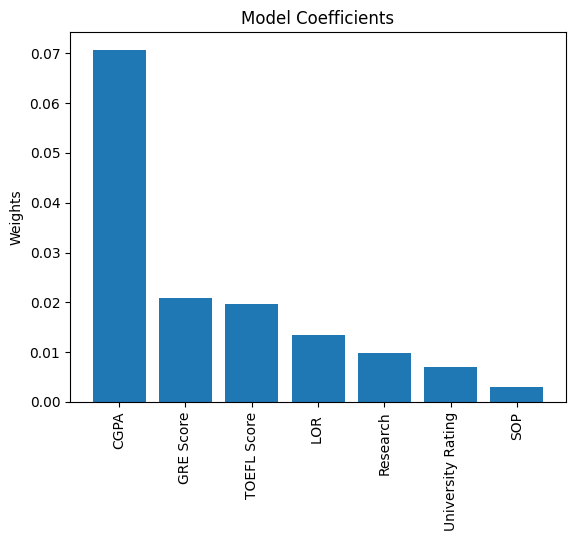

In [105]:
model_weights=list(zip(df.columns, model_LR.coef_[0]))
model_weights.sort(key=lambda x:x[1], reverse=True)

features = [i[0] for i in model_weights]
weights = [i[1] for i in model_weights]

plt.bar(x=features, height=weights)
plt.title('Model Coefficients')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.show();

As some of the feature weights are below .01, after confirming from other stats models we can proceed with removing irrelevant features.

##**Linear Regression Model using Statsmodel Library**##

In [106]:
# add constant to elevate regression model
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)


In [107]:
from statsmodels.formula.api import ols

In [108]:
model = sm.OLS(y_train.values.reshape(-1,1),X_train).fit()

In [109]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          2.10e-142
Time:                        10:14:02   Log-Likelihood:                 559.27
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7209      0.00

#Performing hypothesis testing on model,# considering

*   Null Hypothesis as 'Not significant feature'.
*   Alternate hypothesis as 'Significant feature'
*   P>|t| < 0.05, we can conclude that feature is stastically significant in making decision.
*   P>|t| > 0.05, we can conclude that the feature is not sstastically significant.
*   We proceed with removing non significant feature column. i.e 'SOP' = 0.555 > 0.05.



#Retaining Model after removing non-significant column#

In [110]:
#removing column 'SOP'
X_train = X_train.drop(columns = 'SOP')

#retraining model
model1 = sm.OLS(y_train.values.reshape(-1,1), X_train).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     301.1
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          1.38e-143
Time:                        10:14:02   Log-Likelihood:                 559.10
No. Observations:                 400   AIC:                            -1104.
Df Residuals:                     393   BIC:                            -1076.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7209      0.00

*   Removing 'SOP' column was good decision as R2 score and Adjusted R2 score retained as before i.e 82%.
*   But 'University Rating' still have P>|t| = .079 which is greater than 0.05, so we can proceed with removing this column.

In [111]:
#Removing "University Rating" and Retraining model
X_train = X_train.drop(columns = 'University Rating')
model1 = sm.OLS(y_train.values.reshape(-1,1), X_train).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     358.8
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          3.24e-144
Time:                        10:14:02   Log-Likelihood:                 557.52
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     394   BIC:                            -1079.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7209      0.003    238.342      

*  Adjusted R2 and R2 score are not affected much by removing 'Universit Rating', so it was a good decision.
*  Now there are no such column whose p-value is greater than 0.05.
*  Highest coeficient defines the feature with highest importance.
*  Here 'CGPA' has highest coef = .7209 making most important for prediction.
*  Now the weights are adjusted.

#Testing multiple assumption of Linear Regression Model#

*  VIF and Multicolinearity
*  Mean Residual
*  Linearity of variables
*  Homoscedasticity
*  Normality of residuals

#Multicolinearity and Final retraining#

The VIF (Variance Inflation Factor) is a statistical measure used to identify multicollinearity in a linear regression model. Multicollinearity occurs when two or more independent variables are highly correlated with each other.

The VIF formula is:

VIF = 1 / (1 - R^2)

where R^2 is the coefficient of determination from a regression of the independent variable on the other independent variables.



In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= []

for i in range(X_train.shape[1]):
  vif.append((variance_inflation_factor(X_train.values, i)))

pd.DataFrame(vif, index= X_train.columns, columns=['VIF'])

,VIF
const,1.000000
GRE Score,4.831686
TOEFL Score,4.143044
LOR,1.707537
CGPA,4.347627
Research,1.497954


All the values are below 5 so we do not need to remove any futher columns and by OLS stats we have already removed non-significant column 'SOP' and 'University Rating'.

#Prediction after removing non-significant column and checking VIF.#

In [113]:
#performing prediction on test data

X_test_new = X_test.drop(columns = ['SOP', 'University Rating'])



In [114]:
#adding constant to test data
X_test_new = sm.add_constant(X_test_new)

In [115]:
#predicting model
pred = model1.predict(X_test_new)

In [116]:
# Checking MAE and RMSE
MAE = np.round(metrics.mean_absolute_error(y_test, pred), 4)
RMSE = np.round(metrics.mean_squared_error(y_test, pred, squared= False),4)

print(f"MAE: {MAE}\nRMSE: {RMSE}")

MAE: 0.0414
RMSE: 0.0586


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Removing irrelevant column was good choice as MAE and RMSE are not affected**

#Mean of Resuduals#


*  The mean of residuals, is a statistical measure used to evaluate the goodness of fit of a model to a dataset. It is calculated by taking the average of the differences between the observed values and the predicted values of a regression model(y^-yi).
*  A mean of residuals close to zero indicates that the model is a good fit to the data, while a non-zero mean suggests that the model may not be capturing the underlying patterns in the data.
*  Measures the central tendency of the residuals.

In [117]:
import numpy as np

pred = pred.values.reshape(-1, 1)  # Convert and reshape to (100, 1)



<ipython-input-118-666e051b803e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


Mean of residuals : Chance of Admit     0.004075
dtype: float64


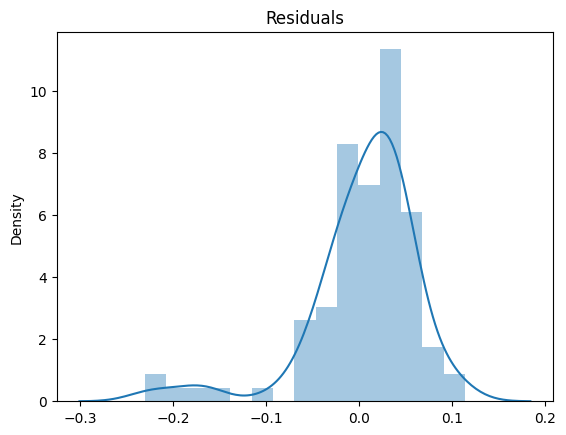

In [118]:
residuals = (y_test - pred)
res = residuals.mean()
sns.distplot(residuals)
plt.title("Residuals")
print ("Mean of residuals :" ,res)

As Mean of Residuals are close to zero, we can conclude that the model is unbiased.

#Linearity of Variables#

*  Relationship between independent and dependent variables is linear, a change in one variable will be proportional to other, predictable change in the other variable.
*  The relation can be detected by using pairplot between residual vs actual plot.

In [119]:
# y_pred = np.array(y_pred), y_pred.reshape(-1,1)
# residuals = np.reshape()
# sns.scatterplot(x = y_pred, y=residuals)
# plt.title('Residual Plot')
# plt.xlabel('Predicted Values')
# plt.ylabel('Residuals')
# plt.axhline(y=0, color='r', linestyle='--')
# plt.show();

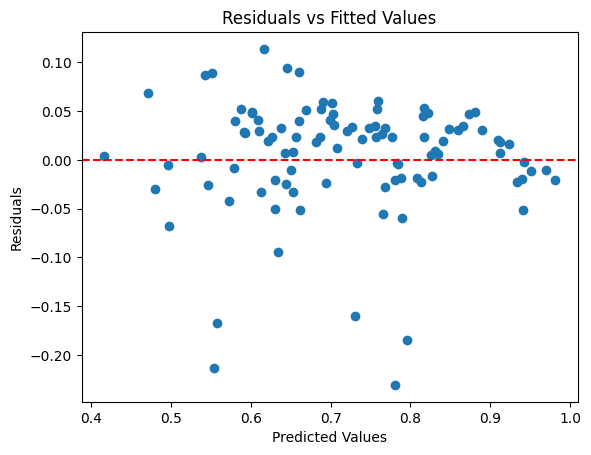

In [120]:
import matplotlib.pyplot as plt

# residuals = y_test - pred  # Calculate residuals

# Plot residuals vs fitted values
plt.scatter(pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


*  Since the residuals do not show a systematic pattern, it suggests that the linearity assumption holds for regression model.
*  The model satisfies the linearity assumption as there is no discernible pattern in the residuals.

#Homoscedasticity Check#

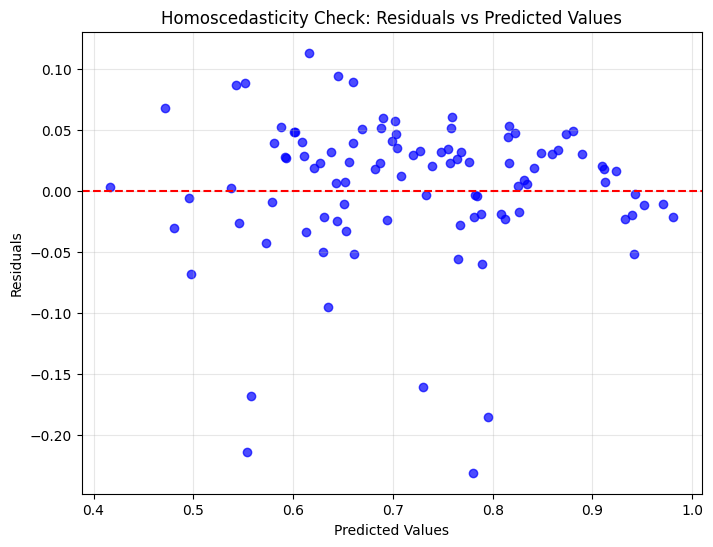

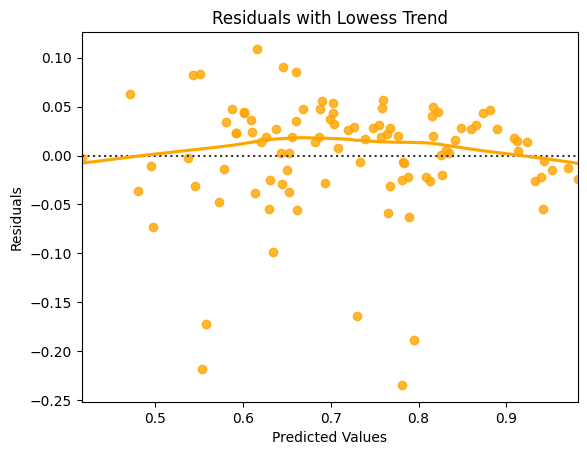

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
# residuals = y_test - pred  # Assuming y_test and pred are already defined

# Create a scatter plot of residuals vs fitted (predicted) values
plt.figure(figsize=(8, 6))
plt.scatter(pred, residuals, alpha=0.7, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title("Homoscedasticity Check: Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(alpha=0.3)
plt.show()

# Optional: Add a trend line to visualize patterns
sns.residplot(x=pred.flatten(), y=residuals, lowess=True, color="orange")
plt.title("Residuals with Lowess Trend")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that homoscedasticity is met.

#Normality of Residuals#





*   The normality of residuals is an assumption in linear regression that states residuals should follow a normal distribution. Here are multiple ways to check for normality.
*   **Histogram of Residuals**
Ploting histogram to visually inspect whether the residuals follow a bell-shaped curve.
*   **Q-Q Plot (Quantile-Quantile Plot)**
A Q-Q plot compares the quantiles of the residuals against a standard normal distribution. If the residuals are normally distributed, the points will lie along a straight line.
*   **Statistical Tests**
    a. **Shapiro-Wilk Test**
Tests the null hypothesis that the data is normally distributed.
p-value > 0.05: Fail to reject the null hypothesis (data is normally distributed).
*   b. **Kolmogorov-Smirnov Test**
Compares the distribution of residuals to a standard normal distribution.
*   **Density Plot (KDE Plot)**
Compare the density plot of residuals against a normal distribution curve.



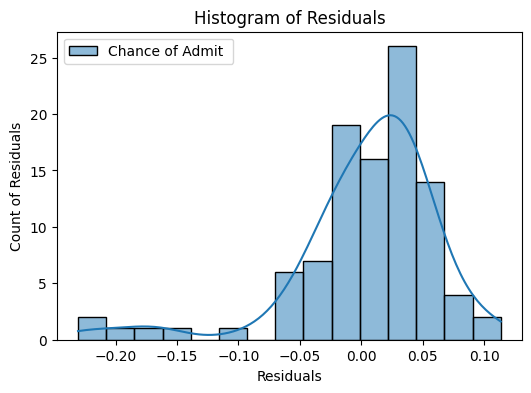

In [122]:
# Plot histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde = True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Count of Residuals")
plt.show()

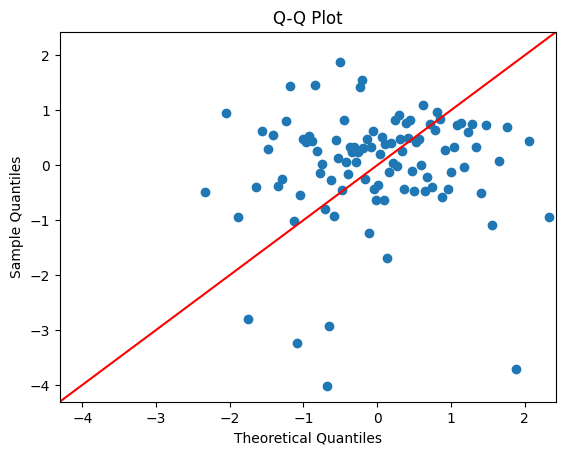

In [123]:
import statsmodels.api as sm

# Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot")
plt.show()

As the datapoint are distributed along the q-q line shows the dataset follow normality with more skewness.

#Business Insights

*  **Strong Correlation of Exam Scores:**

Exam scores (GRE, TOEFL, and CGPA) are highly correlated with the chance of admit, indicating that academic performance plays a crucial role in admissions decisions.

*  **Significant Predictor Variables:**

Based on the OLS model results:
CGPA is the most significant predictor (coefficient = 0.0740, 𝑝<0.001 ),highlighting its importance in admissions.

SOP, LOR, and University Rating, while significant, have relatively lower coefficients, suggesting their lesser impact compared to CGPA.

* **Model Performance:**
The OLS model captures 82% of the variance in the target variable, Rsquare 82% and adjR2square 81%.

*  **Regression Assumptions Met:**

Key assumptions for linear regression (linearity, normality of residuals, mean of residuals close to zero, and homoscedasticity) are satisfied, supporting the reliability of the results.

#Recommendation



*   Since all the exam scores are highly correlated, it is recommended to add more independent features for better prediction


*   Examples of other independent variables could be work experience, internships, mock interview performance, extracurricular activities or diversity variables


